In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
train = pd.read_csv('titanic_train.csv')

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [13]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [167]:
train.isnull()

,male,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

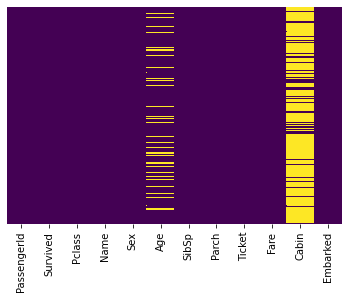

In [18]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

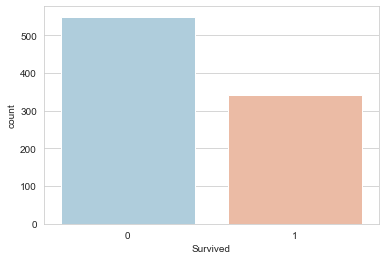

In [31]:
sns.set_style('whitegrid')
sns.countplot(data=train, x='Survived', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

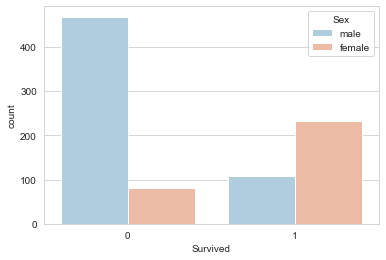

In [41]:
sns.set_style('whitegrid')
sns.countplot(data=train, x='Survived', hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

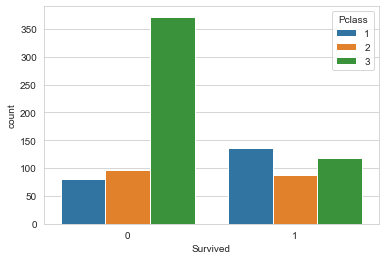

In [46]:
sns.set_style('whitegrid')
sns.countplot(data=train, x='Survived', hue='Pclass')

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

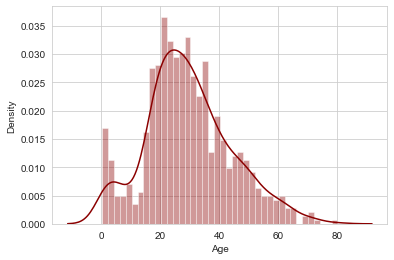

In [53]:
sns.distplot(train['Age'].dropna(),kde=True,color='darkred',bins=40)

<AxesSubplot:xlabel='Age', ylabel='Count'>

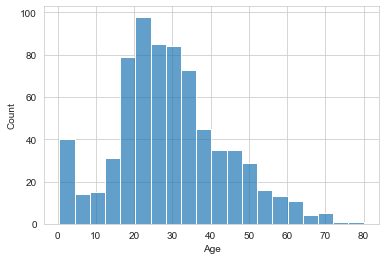

In [56]:
sns.histplot(data=train, x='Age',alpha=0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

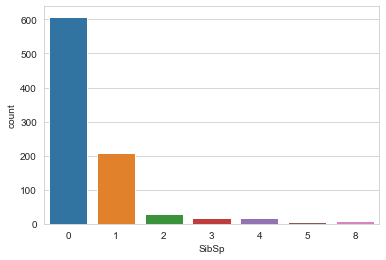

In [59]:
sns.countplot(data=train, x='SibSp')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

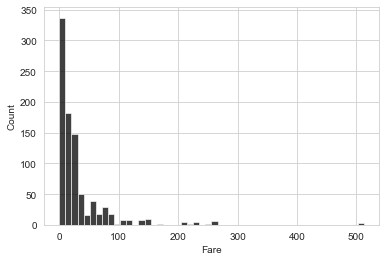

In [77]:
sns.histplot(data=train['Fare'],bins=50,color='black')

<AxesSubplot:>

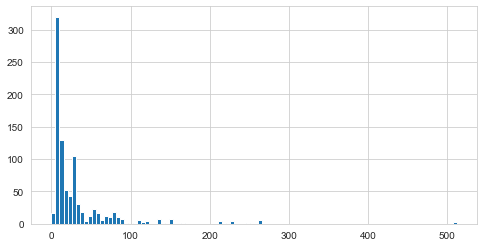

In [81]:
train.Fare.hist(bins=100,figsize=(8,4))

In [85]:
import cufflinks as cf
cf.go_offline()

In [91]:
train['Fare'].iplot(kind='hist',color='green')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

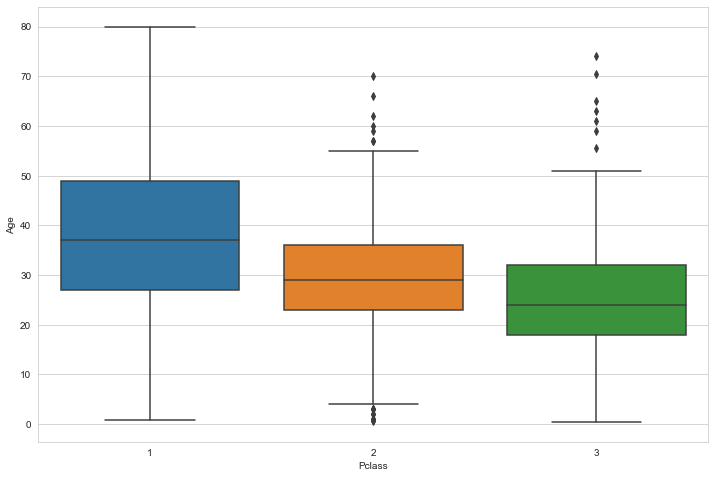

In [106]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train, x='Pclass',y='Age')

In [111]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
            return Age

In [112]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

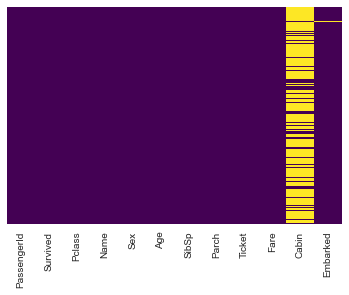

In [118]:
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [228]:
#train.drop('Cabin',axis=1)

In [126]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [129]:
train.dropna(inplace=True)

<AxesSubplot:>

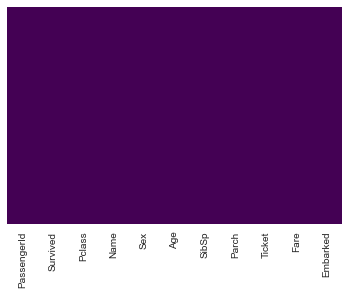

In [130]:
sns.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [134]:
sex= pd.get_dummies(data=train['Sex'],drop_first=True)

In [135]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [140]:
embark= pd.get_dummies(data=train['Embarked'],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [148]:
#train.drop(['Sex','Embarked','Ticket','Name'],axis=1,inplace=True)

In [150]:
train=pd.concat([sex,train,embark],axis=1)

In [151]:
train.head()

,male,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S
0,1,1,0,3,22.0,1,0,7.2500,0,1
1,0,2,1,1,38.0,1,0,71.2833,0,0
2,0,3,1,3,26.0,0,0,7.9250,0,1
3,0,4,1,1,35.0,1,0,53.1000,0,1
4,1,5,0,3,35.0,0,0,8.0500,0,1


In [152]:
train.drop('PassengerId',axis=1,inplace=True)

In [153]:
train.head()

,male,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1
1,0,1,1,38.0,1,0,71.2833,0,0
2,0,1,3,26.0,0,0,7.9250,0,1
3,0,1,1,35.0,1,0,53.1000,0,1
4,1,0,3,35.0,0,0,8.0500,0,1


In [154]:
from sklearn.model_selection import train_test_split

In [158]:
 X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.2, 
                                                     random_state=42)

In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
logmodel = LogisticRegression()

In [162]:
logmodel.fit(X_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [163]:
predictions = logmodel.predict(X_test)

In [164]:
from sklearn.metrics import classification_report

In [165]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.73      0.78      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.80       178



In [168]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[89 20]
 [15 54]]


## Advertisement Portfolio Project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ad_data = pd.read_csv('advertising.csv')

In [5]:
ad_data.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [6]:
ad_data['Ad Topic Line'].unique()

array(['Cloned 5thgeneration orchestration',
       'Monitored national standardization',
       'Organic bottom-line service-desk',
       'Triple-buffered reciprocal time-frame',
       'Robust logistical utilization', 'Sharable client-driven software',
       'Enhanced dedicated support', 'Reactive local challenge',
       'Configurable coherent function',
       'Mandatory homogeneous architecture',
       'Centralized neutral neural-net',
       'Team-oriented grid-enabled Local Area Network',
       'Centralized content-based focus group',
       'Synergistic fresh-thinking array',
       'Grass-roots coherent extranet',
       'Persistent demand-driven interface',
       'Customizable multi-tasking website', 'Intuitive dynamic attitude',
       'Grass-roots solution-oriented conglomeration',
       'Advanced 24/7 productivity',
       'Object-based reciprocal knowledgebase',
       'Streamlined non-volatile analyzer',
       'Mandatory disintermediate utilization',
       'Futur

In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [8]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<AxesSubplot:xlabel='Age', ylabel='Count'>

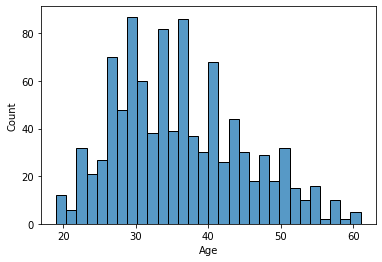

In [9]:
sns.histplot(data=ad_data['Age'],bins=30)

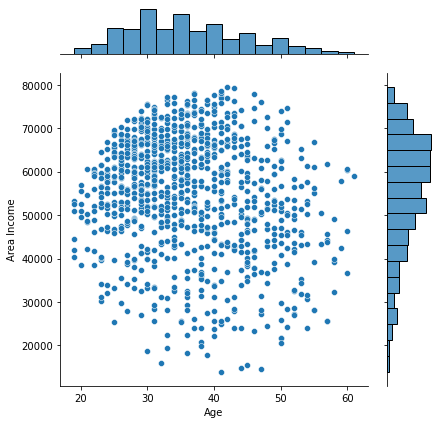

In [10]:
sns.jointplot(data=ad_data, x='Age', y='Area Income', space=0.4)

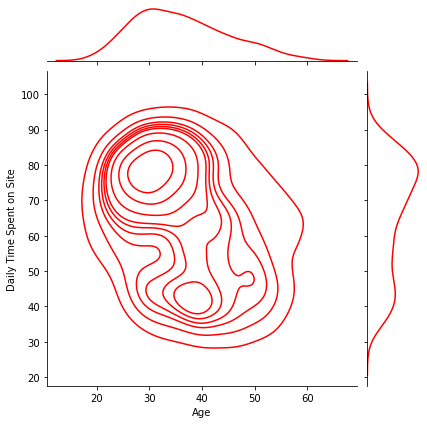

In [11]:
sns.jointplot(data=ad_data, x = 'Age', y='Daily Time Spent on Site', kind='kde',color='red')

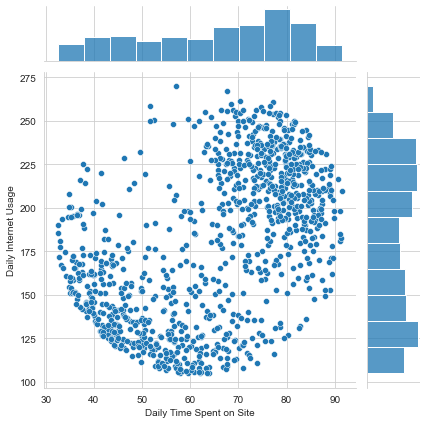

In [196]:
sns.jointplot(data=ad_data, x='Daily Time Spent on Site' , y='Daily Internet Usage')

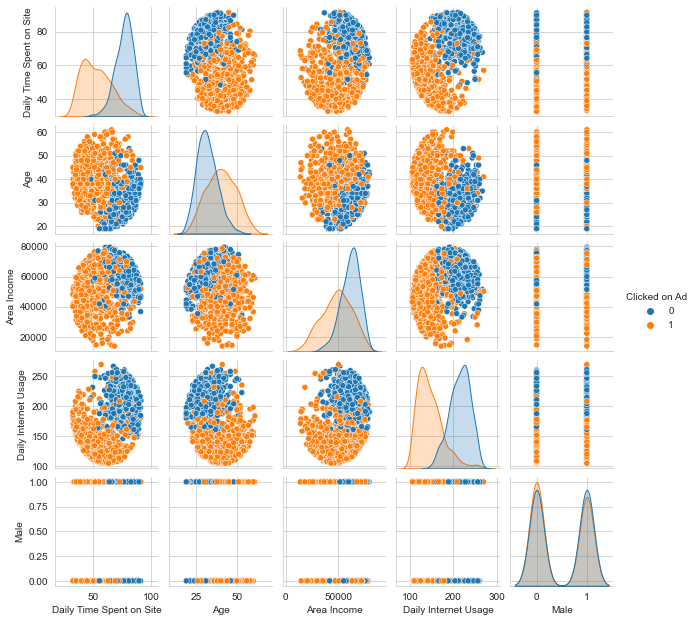

In [202]:
sns.pairplot(data=ad_data, hue='Clicked on Ad',height=1.75)

In [215]:
#ad_data = ad_data.drop('City',axis=1)
#ad_data = ad_data.drop('Country', axis=1)
#ad_data = ad_data.drop('Ad Topic Line',axis=1)
ad_data = ad_data.drop('Timestamp',axis=1)

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [221]:
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop('Clicked on Ad',axis=1), ad_data['Clicked on Ad'], test_size=0.2, random_state=42)

In [222]:
logisticmodel = LogisticRegression()

In [223]:
logisticmodel.fit(X_train,y_train)

LogisticRegression()

In [225]:
predicted = logisticmodel.predict(X_test)

In [227]:
print(classification_report(predicted,y_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89       101
           1       0.86      0.96      0.90        99

    accuracy                           0.90       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.90      0.90       200

